In [1]:
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

import pickle
from matplotlib import pyplot as plt

## 2. Targeted Attack

In [2]:
from Week567_General_Code_Question import LeNet5, fgsm_target, pgd_target, evaluate, fgsm
from Week567_General_Code_Question import visualize_target_adv

In [3]:
model = LeNet5()
### 请将Week5保存的lenet5.pt迁移到/model路径下
model.load_state_dict(torch.load('model/lenet5.pt'))
model.eval()

criterion = nn.CrossEntropyLoss()

In [4]:
with open('data/Week567_img_label.pkl', 'rb') as f:
    data = pickle.load(f)
    imgs, labels, target_labels = data['img'], data['label'], data['target_label']

### 2.1 FGSM

In [5]:
# perform fgsm attack and evaluate
epsilon = 0.4
fgsm_xs = fgsm_target(imgs, epsilon, model, criterion, target_labels)
pred_label = evaluate(fgsm_xs, target_labels, model)

match rate: 0.65


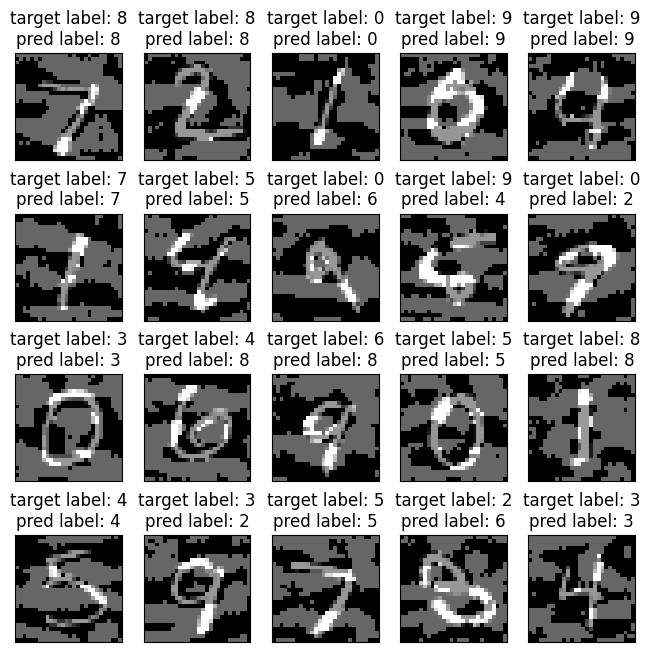

In [6]:
fgsm_imgs = fgsm_xs.reshape_as(imgs)
visualize_target_adv(fgsm_imgs, target_labels, pred_label)

### 2.2 PGD

In [7]:
# perform pgd attack and evaluate
epsilon = 0.4
iter = 100
pgd_xs = pgd_target(imgs, epsilon, iter, model, criterion, target_labels)
pred_label = evaluate(pgd_xs, target_labels, model)

match rate: 0.7


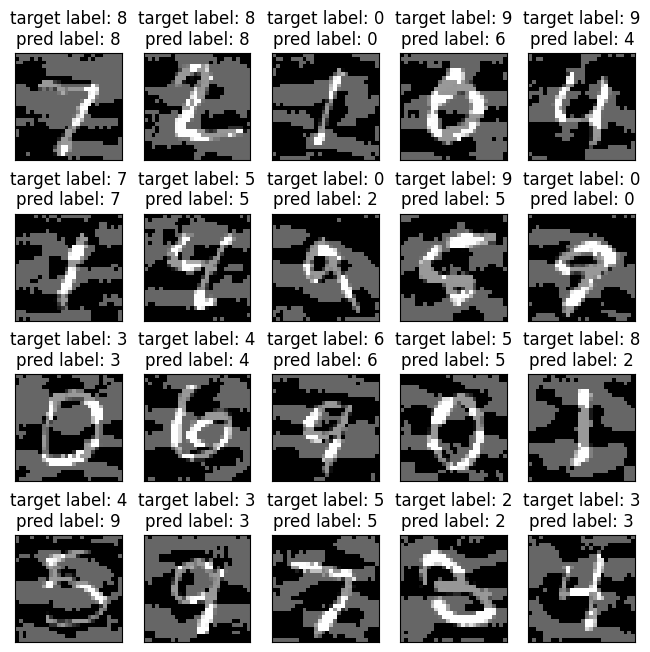

In [8]:
pgd_imgs = pgd_xs.reshape_as(imgs)
visualize_target_adv(pgd_imgs, target_labels, pred_label)

In [9]:
# 计算从原始图像到扰动图像的差异
delta_fgsm = fgsm_imgs - imgs
delta_pgd = pgd_imgs - imgs

# 计算L2距离
print(f'L2_FGSM: {delta_fgsm.pow(2).sum(dim=-1).sqrt().mean()}')
print(f'L2_PGD: {delta_pgd.pow(2).sum(dim=-1).sqrt().mean()}')

L2_FGSM: 1.279727816581726
L2_PGD: 2.2140684127807617
